In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data = pd.DataFrame(data['data'], columns = data['feature_names'])

In [5]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [6]:
# create new categorical column
data['category'] = np.where(data['mean radius'] > 15, 'large', 'small')

In [7]:
data_na = data.copy()

In [8]:
for col in [ 'mean texture', 'worst texture', 'category']:
    to_be_nas = data.sample(int(.3*data.shape[0]))
    to_be_nas[col] = np.nan
    data_na.loc[to_be_nas.index] = to_be_nas

In [9]:
data_na

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,category
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,large
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,NaN,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,large
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,small
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,NaN,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,NaN,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,large


In [10]:
import os
os.chdir('C:\\Users\\dka2211.57872\\Documents\\missensemble\\src\\')

In [11]:
from miss_ensemble import MissEnsemble

In [ ]:
estimator = MissEnsemble(n_iter=100,
                       categorical_vars=['category'],
                       #ordinal_vars=ord_cols,
                       numerical_vars=[ 'mean texture', 'worst texture'],
                       n_estimators=1000, ens_method = 'forest',
                       print_criteria = True,
                       random_state = 3)

In [105]:
data_na.dtypes.value_counts()

float64    30
object      1
Name: count, dtype: int64

In [106]:
out = estimator.fit_transform(data_na)

{'criterion_cat': [0.07161803713527852], 'criterion_num': [0.04691777392809152]}
{'criterion_cat': [0.07161803713527852, 0.05570291777188329], 'criterion_num': [0.04691777392809152, 0.0011251858663792376]}
{'criterion_cat': [0.07161803713527852, 0.05570291777188329, 0.05305039787798409], 'criterion_num': [0.04691777392809152, 0.0011251858663792376, 0.000722899970295516]}
{'criterion_cat': [0.07161803713527852, 0.05570291777188329, 0.05305039787798409, 0.023872679045092837], 'criterion_num': [0.04691777392809152, 0.0011251858663792376, 0.000722899970295516, 0.00048064621685928914]}
{'criterion_cat': [0.07161803713527852, 0.05570291777188329, 0.05305039787798409, 0.023872679045092837, 0.03183023872679045], 'criterion_num': [0.04691777392809152, 0.0011251858663792376, 0.000722899970295516, 0.00048064621685928914, 0.0002961024056315202]}
{'criterion_cat': [0.07161803713527852, 0.05570291777188329, 0.05305039787798409, 0.023872679045092837, 0.03183023872679045, 0.03713527851458886], 'criter

In [107]:
estimator.criteria_


{'criterion_cat': [0.07161803713527852,
  0.05570291777188329,
  0.05305039787798409,
  0.023872679045092837,
  0.03183023872679045,
  0.03713527851458886],
 'criterion_num': [0.04691777392809152,
  0.0011251858663792376,
  0.000722899970295516,
  0.00048064621685928914,
  0.0002961024056315202,
  0.0003864642418367501]}

<Axes: >

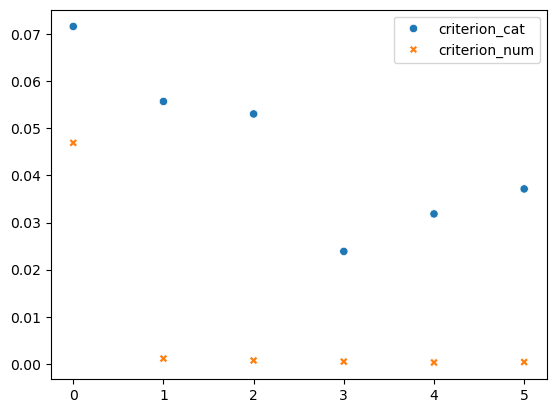

In [108]:
sns.scatterplot(estimator.criteria_)

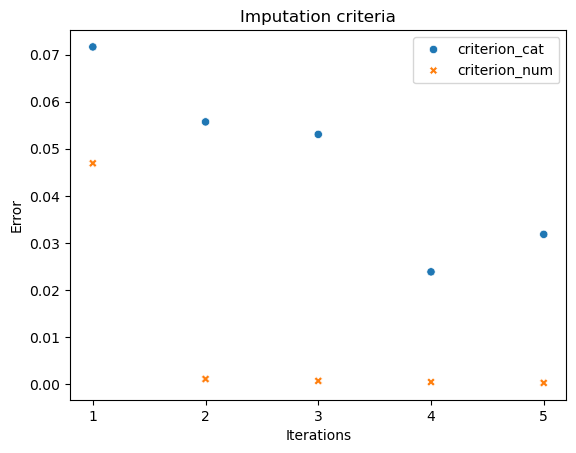

In [109]:
estimator.plot_criteria(plot_final=False)

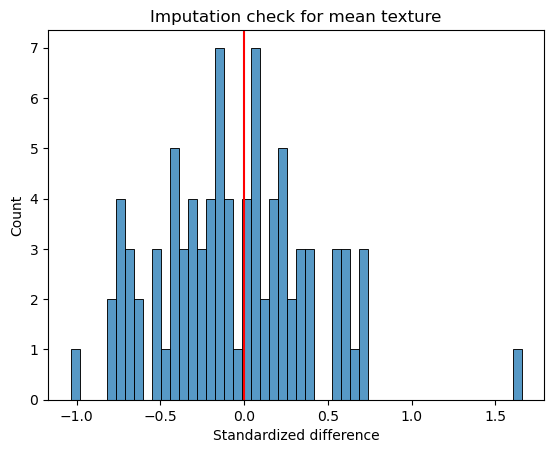

In [110]:
estimator.check_imputation_fit(var_name='mean texture',
                              true_values = data.loc[:, 'mean texture'], 
                               error_type = 'std_diff', 
                               plot_type = 'hist')

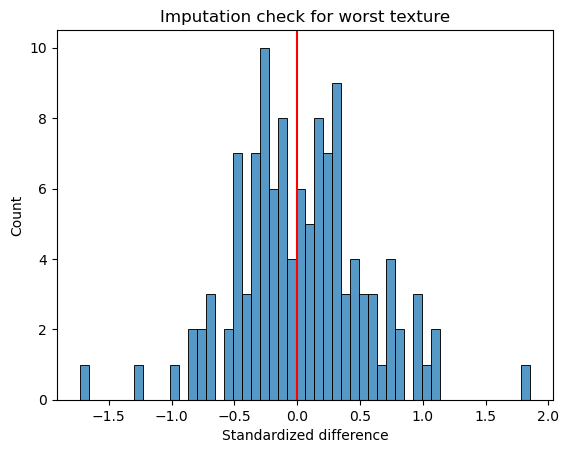

In [111]:
estimator.check_imputation_fit(var_name='worst texture',
                              true_values = data.loc[:, 'worst texture'], 
                               error_type = 'std_diff', 
                               plot_type = 'hist')

In [112]:
(out.loc[data_na[data_na['category'].isna()].index
, :]["category"] == data.loc[data_na[data_na['category'].isna()].index
, :]["category"] ).value_counts(dropna=False, normalize=True)


category
True     0.641176
False    0.358824
Name: proportion, dtype: float64

# Speed Checks

In [21]:
#n_sim = 1000
#times = np.zeros(n_sim)


#for i in np.arange(1, n_sim):
#    print(i)
#    estimator = MissEnsemble(n_iter=100,
#                           #categorical_vars=cat_cols,
#                           #ordinal_vars=ord_cols,
#                           numerical_vars=[ 'mean texture', 'worst texture'],
#                           n_estimators = 50, ens_method = 'forest',
#                           print_criteria = False,
#                           random_state = 3)
#    t0 = time.time()
#    out = estimator.fit_transform(data_na.loc[:4+i, ])
#    t1 = time.time()
#    times[i] = t1 - t0
    

In [22]:
times

NameError: name 'times' is not defined

In [ ]:
sns.scatterplot(times[1:i])

In [ ]:
times[1:i]

In [ ]:
i